In [5]:
import numpy as np # For data management
import pandas as pd # For data management

import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

from sklearn import datasets # To import the sample dataset
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning


In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df=pd.read_csv('gdrive/MyDrive/Data/data_prepared.csv') #Temperature df

In [4]:
df=df.drop(columns=['Unnamed: 0'])
df

,Country,Year,CO2,AverageTemperature
0,Afghanistan,1959,1839179,14.15
1,Afghanistan,1960,2253064,13.99
2,Afghanistan,1961,2743862,14.06
3,Afghanistan,1962,3432456,13.77
4,Afghanistan,1963,4139192,15.03
...,...,...,...,...
10225,Zimbabwe,2009,664256525,21.38
10226,Zimbabwe,2010,672134841,21.99
10227,Zimbabwe,2011,681878824,21.60
10228,Zimbabwe,2012,689761713,21.52


In [6]:
df_2010 = df
df_2010 = df[df['Year']==2010]

df_2010 = df_2010[df_2010['Country']!='United States']

df_2010 = df_2010[df_2010['Country']!='China']
df_2010 = df_2010.reset_index()

df_2010=df_2010.drop(columns=['index','Year','Country'])
df_2010

,CO2,AverageTemperature
0,100148964,15.83
1,236833632,13.78
2,3127578673,25.22
3,10292176,11.48
4,388098878,22.68
...,...,...
179,6287291303,26.15
180,2045911557,24.83
181,474047019,27.30
182,192949360,22.27


In [7]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_2010)

scaled_dataframe = pd.DataFrame( scaled_array, columns = df_2010.columns )

# DBSCAN

In [10]:
dbscan_model = DBSCAN( eps = 0.25, min_samples = 9)
dbscan_model.fit(scaled_dataframe)
labels = dbscan_model.labels_

df_2010["LABEL"] = labels
df_2010.head(15)

,CO2,AverageTemperature,LABEL
0,100148964,15.83,-1
1,236833632,13.78,1
2,3127578673,25.22,0
3,10292176,11.48,1
4,388098878,22.68,0
5,2022528,27.86,0
6,153888,29.24,0
7,6593602747,15.08,-1
8,328026059,11.51,1
9,65193109,28.97,0


# KMEANS

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(
  init="random",
  n_clusters=4,
  n_init=10,
  max_iter=300,
  random_state=42
)

kmeans.fit(df_2010)

labels = kmeans.labels_
df_2010["LABEL"] = labels
df_2010.head(15)

,CO2,AverageTemperature,LABEL
0,100148964,15.83,0
1,236833632,13.78,0
2,3127578673,25.22,0
3,10292176,11.48,0
4,388098878,22.68,0
5,2022528,27.86,0
6,153888,29.24,0
7,6593602747,15.08,1
8,328026059,11.51,0
9,65193109,28.97,0


# PLOT

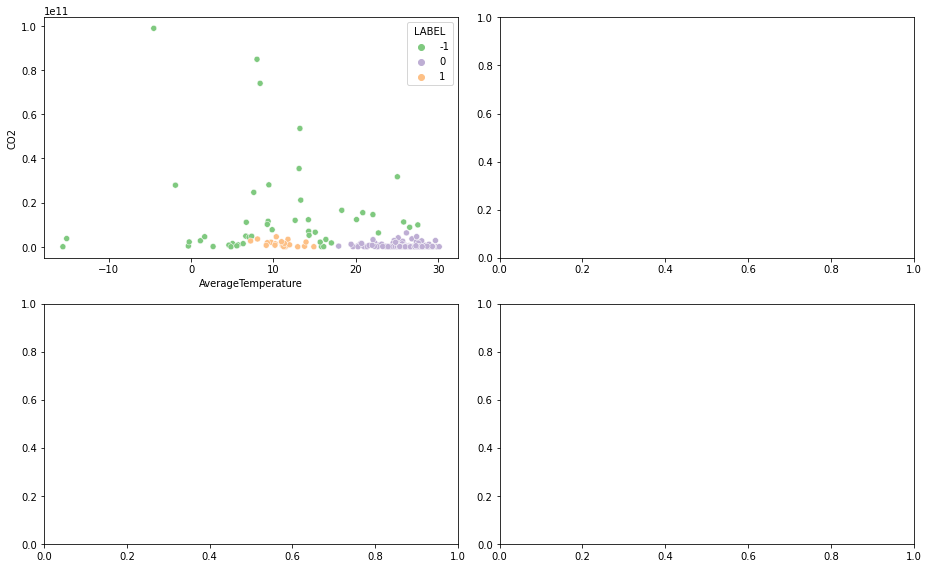

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "AverageTemperature", y = "CO2", data = df_2010, hue = "LABEL", palette = "Accent", ax = ax1)

plt.tight_layout()
plt.show()